#### Подмножество признаков (D1)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
D1 = pd.DataFrame(iris.data, columns=iris.feature_names)

#### Метод главных компонент (PCA → D2)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
D2 = pca.fit_transform(D1)

#### Метод t-SNE (→ D3)

In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
D3 = tsne.fit_transform(D1)

#### Визуализация D2 и D3

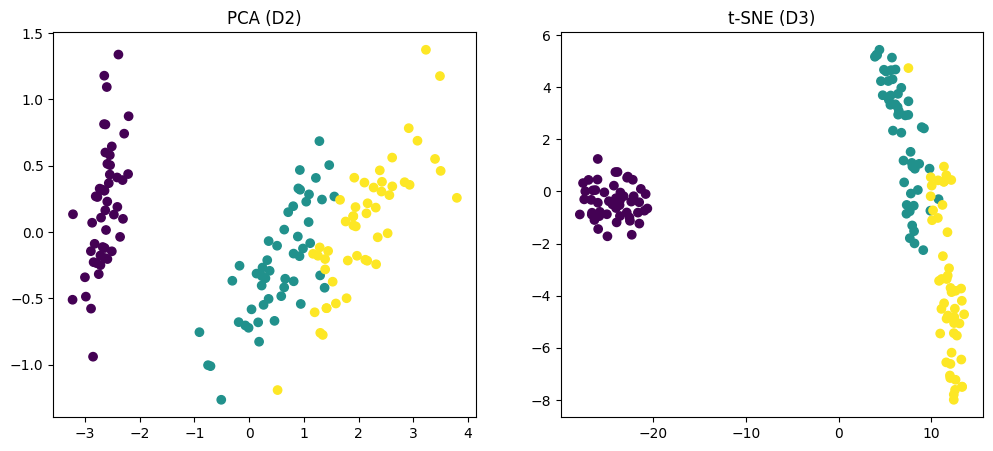

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(D2[:, 0], D2[:, 1], c=iris.target)
plt.title("PCA (D2)")
plt.subplot(1, 2, 2)
plt.scatter(D3[:, 0], D3[:, 1], c=iris.target)
plt.title("t-SNE (D3)")
plt.show()

Вывод:
* PCA (D2): Частично разделяет 3 кластера, но два из них (versicolor и virginica) перекрываются.
* t-SNE (D3): Четко разделяет все 3 кластера. Кластеры выделены наиболее явно.

#### Кластеризация и оценка качества

* Используем методы:
  * K-Means
  * Agglomerative Clustering
  * DBSCAN
* Метрики:
  * Silhouette Score
  * Adjusted Rand Index (ARI)

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

datasets = {"D1": D1, "D2": D2, "D3": D3}
results = []

for name, data in datasets.items():
    # K-Means
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    
    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=3)
    agg_labels = agg.fit_predict(data)
    
    # DBSCAN (подбор параметров)
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(data)
    
    # Оценка
    for method, labels in zip(
        ["K-Means", "Agglomerative", "DBSCAN"],
        [kmeans_labels, agg_labels, dbscan_labels]
    ):
        if len(set(labels)) > 1:  # Silhouette требует >1 кластера
            sil = silhouette_score(data, labels)
        else:
            sil = -1
        ari = adjusted_rand_score(iris.target, labels)
        results.append({
            "Dataset": name,
            "Method": method,
            "Silhouette": sil,
            "ARI": ari
        })

results_df = pd.DataFrame(results)
print(results_df)

  Dataset         Method  Silhouette       ARI
0      D1        K-Means    0.552819  0.730238
1      D1  Agglomerative    0.554324  0.731199
2      D1         DBSCAN    0.486034  0.520619
3      D2        K-Means    0.597676  0.716342
4      D2  Agglomerative    0.598475  0.744526
5      D2         DBSCAN    0.583802  0.551005
6      D3        K-Means    0.685048  0.744526
7      D3  Agglomerative    0.687740  0.759199
8      D3         DBSCAN   -0.496251  0.021020


c:\Users\matve\Downloads\mlt\MLT_course\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\matve\Downloads\mlt\MLT_course\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\matve\Downloads\mlt\MLT_course\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### Выводы

* t-SNE (D3) дает наилучшую визуализацию и кластеризацию благодаря сохранению локальных расстояний.
* K-Means и Agglomerative работают хорошо на всех датасетах, но DBSCAN менее устойчив к перекрытиям.
* Для Iris с его линейно неразделимыми классами t-SNE + Agglomerative — оптимальное сочетание.